In [1]:
import dask.dataframe as dd, pandas as pd

import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

Here we will consider the task of predicting the `etcusd` pair using a selection of other pairs. A possible application of this is to construct out-of-sample residuals which can be used in a statistical arbitrage strategy. The most obvious approach to dealing with heteroskedasticity/nonstationarity is to normalise features & targets across time (or perhaps take a z-score). But another approach, which is used here, is to model heteroskedasticity directly. Here, an MLP is constructed with two outputs: mean and variance. We just consider a fixed moment in time, and do not evaluate this across time.

In [8]:
import dask.dataframe as dd, pandas as pd

USECOLS = ("time", "open", "close", "high", "low", "volume", "pair_name", "date")

In [10]:
data = dd.read_csv("data/*", usecols=USECOLS)

daily_prices = data.groupby(["date", "pair_name"]).last().compute()
daily_prices = daily_prices.reset_index().pivot(values="close", index="date", columns="pair_name")
daily_prices.index = pd.to_datetime(daily_prices.index)

In [11]:
daily_prices.count().sort_values(ascending=False)

pair_name
etcusd           2347
etcbtc           2346
zecbtc           2258
zecusd           2257
xmrbtc           2225
                 ... 
exrd-usd            5
exrd-btc            5
sushif0-ustf0       4
lunaf0-ustf0        4
dapp-ust            1
Length: 474, dtype: int64

<AxesSubplot: xlabel='date'>

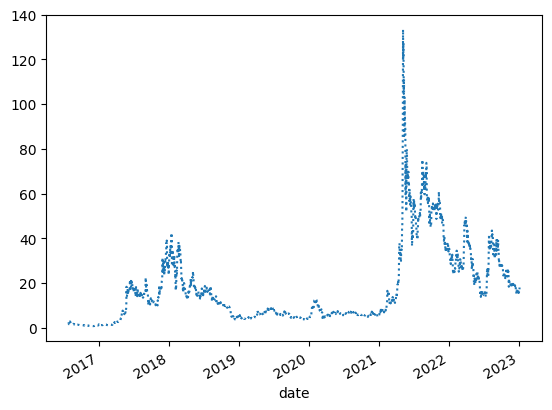

In [17]:
daily_prices["etcusd"].plot(linestyle=":")

<AxesSubplot: xlabel='date'>

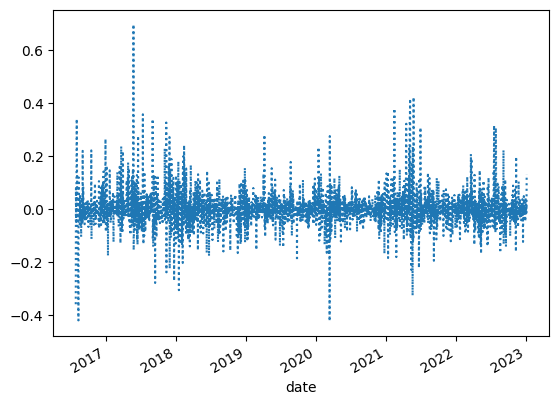

In [18]:
daily_prices["etcusd"].pct_change().plot(linestyle=":")

In [19]:
N_LARGEST = 20

In [20]:
pairs = daily_prices.count().sort_values(ascending=False).index[:N_LARGEST]

In [23]:
import seaborn as sns

In [24]:
def plot_clustermap(df, corr=True):
    if corr:
        df = df.corr(method="spearman")
    return sns.clustermap(
        df,
        method="complete",
        cmap="RdBu",
        annot=True,
        fmt=".2f",
        annot_kws={"size": 7},
        vmin=-1,
        vmax=1,
        figsize=(15, 12),
    )

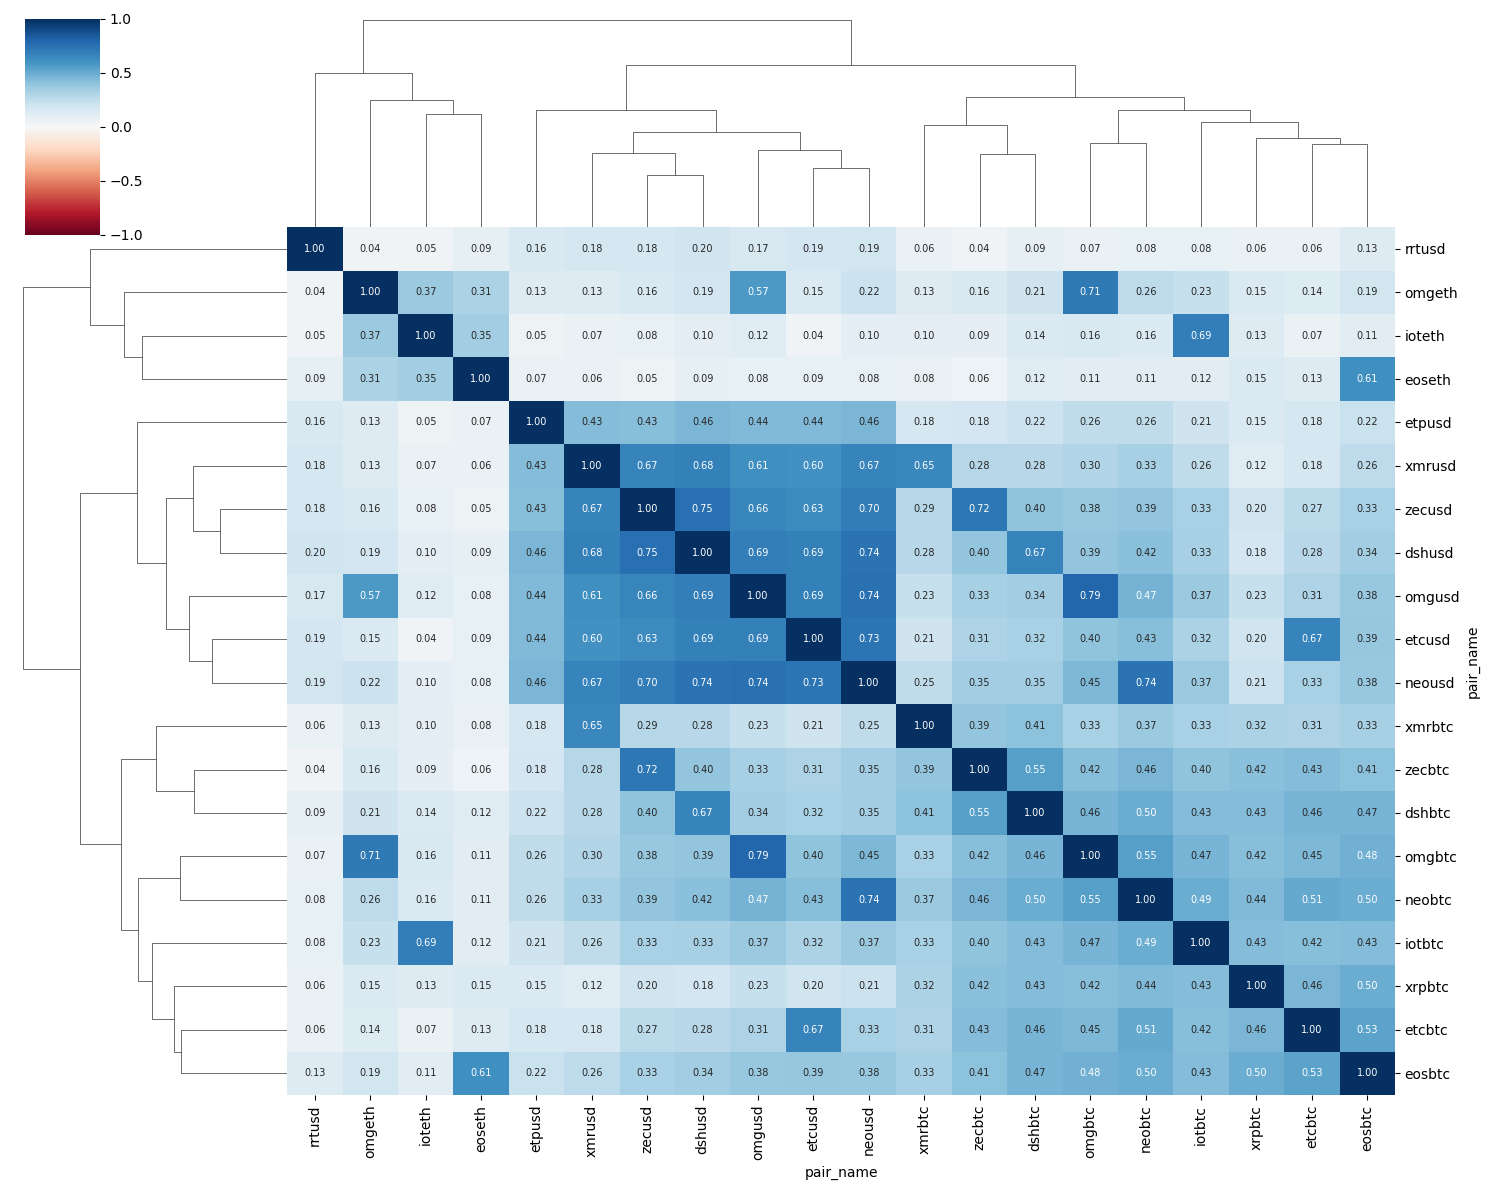

In [25]:
plot_clustermap(daily_prices[pairs].pct_change())

In [ ]:
X = daily_prices[pairs].pct_change()